In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import VersionZeroPointZero as PSS
import math as maths
import scipy as sp
from scipy import signal
import pickle
import datetime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
Sig1 = PSS.Signal(bw = 40, SignalType = 'voltage', data_type = 'int16')

In [12]:
Psr1 = PSS.Pulsar(Sig1)
Psr1.make_pulses()

In [13]:
# cast to int32, maybe float32???
now = datetime.datetime.now()
data_to_write = np.array([])
file_str = "../PulsarSignalOutputs/notebook_signal(%g.%g.%g).bin" % (now.year, now.month, now.day)
with open(file_str, 'wb') as file:
    for index in range(0, Psr1.phase.size):
        real = Psr1.signal[0][index]
        imag = Psr1.signal[1][index]
        data_to_write = np.append(data_to_write, complex(real, imag))
#         data_to_write = np.append(data_to_write, real)
#         data_to_write = np.append(data_to_write, imag)
    pickle.dump(data_to_write, file)

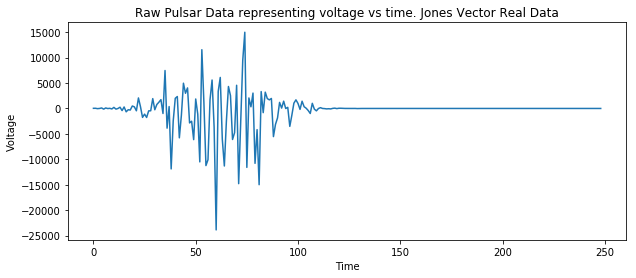

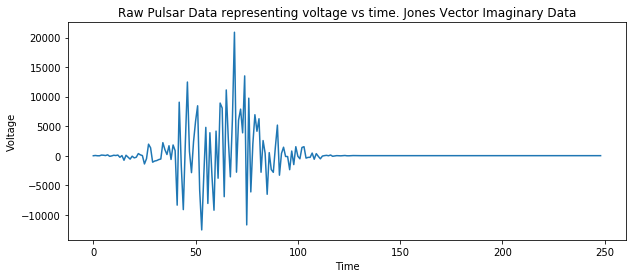

In [14]:
plt.figure(figsize=[10,4])
plt.title("Raw Pulsar Data representing voltage vs time. Jones Vector Real Data")
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.plot(Psr1.signal[0,0:Psr1.phase.size])
plt.show()

plt.figure(figsize=[10,4])
plt.title("Raw Pulsar Data representing voltage vs time. Jones Vector Imaginary Data")
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.plot(Psr1.signal[1,0:Psr1.phase.size])
plt.show()

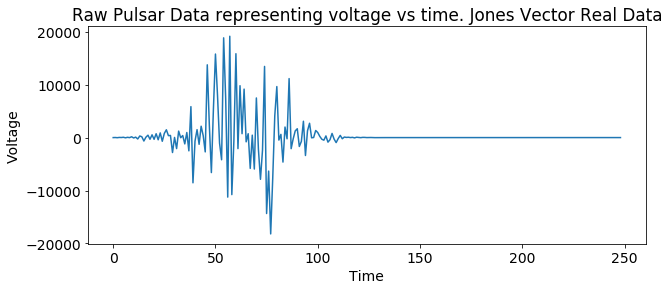

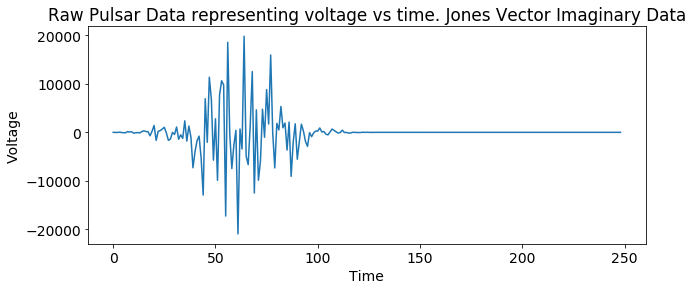

In [9]:
plt.figure(figsize=[10,4])
plt.title("Raw Pulsar Data representing voltage vs time. Jones Vector Real Data")
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.plot(data_to_write[0:data_to_write.size].real)
plt.show()

plt.figure(figsize=[10,4])
plt.title("Raw Pulsar Data representing voltage vs time. Jones Vector Imaginary Data")
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.plot(data_to_write[0:data_to_write.size].imag)
plt.show()

In [ ]:
Ism1 = PSS.ISM(Sig1, DM=81)
Ism1.disperse()

In [ ]:
plt.figure(figsize=[10,4])
plt.title("Dispersed Pulsar Data representing voltage vs time. Jones Vector Real Data")
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.plot(Ism1.signal[0,0:Psr1.phase.size])
plt.show()

plt.figure(figsize=[10,4])
plt.title("Dispersed Pulsar Data representing voltage vs time. Jones Vector Imaginary Data")
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.plot(Ism1.signal[1,0:Psr1.phase.size])
plt.show()